In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

In [2]:
from data import LaneData
data = LaneData('https://minigolf-live.com/turnier1304a/result.htm')

INIT DONE


In [3]:
#define the lanes for the CUP system
lanes_f = [ 'F'+str(i) for i in [1,2,3,8,9,10,13,16,18]]
lanes_e = [ 'E'+str(i) for i in [2,3,6,10,14,15,16,17,18 ]]

LANES_A_ALL = [ 'F'+str(i+1) for i in range(18)]
LANES_B_ALL = [ 'E'+str(i+1) for i in range(18)]  


LANES_A = lanes_f
LANES_B = lanes_e

In [4]:
from bracket import RANK_W,RANK_M

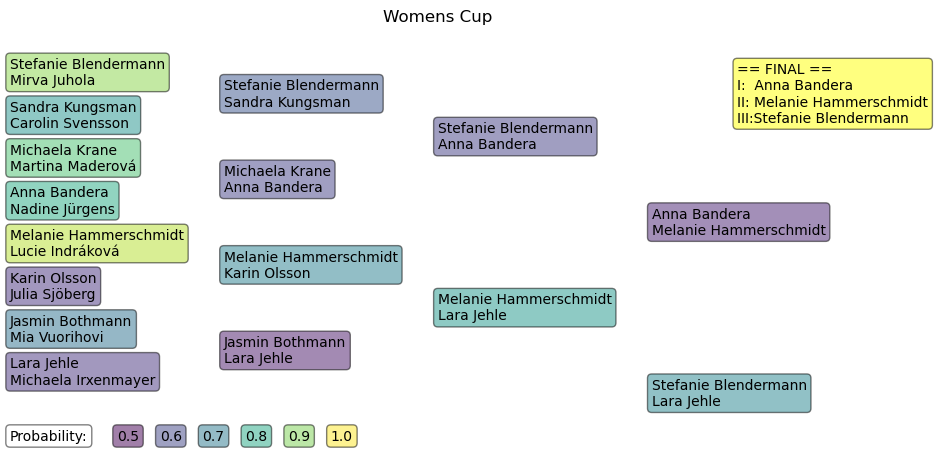

In [21]:
from matchplay_MC import Cup_16, Cup_32
cup_W = Cup_16(RANK_W, data, LANES_A,LANES_B,mc_iter = 10000)
cup_W.plot()
plt.savefig('../FIG/matchplay_W_final',bbox_inches = 'tight')

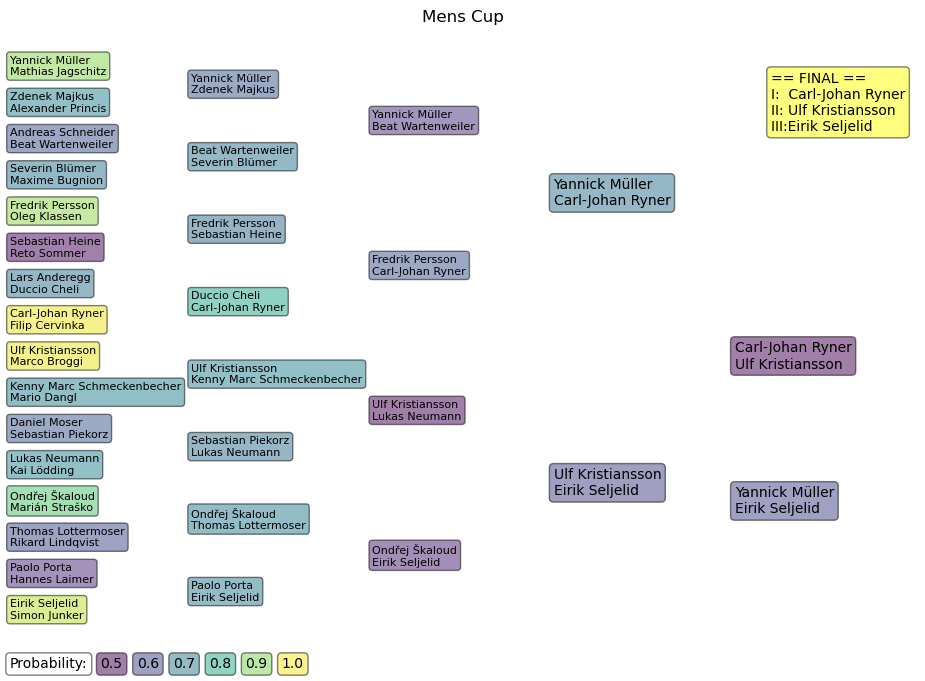

In [20]:
cup_M = Cup_32(RANK_M, data, LANES_A,LANES_B,mc_iter = 10000)
cup_M.plot()
plt.savefig('../FIG/matchplay_M_final',bbox_inches = 'tight')

In [14]:
from matchplay import gen_Cup_16, gen_Cup_32
n_MC = 50000
medals_w = [x.medals for x in gen_Cup_16(RANK_W, data, LANES_A,LANES_B,n_MC) ]
medals_m = [x.medals for x in gen_Cup_32(RANK_M, data, LANES_A,LANES_B,n_MC) ]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

In [15]:
Counter(medals_m).most_common(3)

[(('Carl-Johan Ryner', 'Ulf Kristiansson', 'Eirik Seljelid'), 874),
 (('Ulf Kristiansson', 'Carl-Johan Ryner', 'Eirik Seljelid'), 787),
 (('Carl-Johan Ryner', 'Ulf Kristiansson', 'Ondřej Škaloud'), 759)]

In [25]:
Counter(medals_w).most_common(5)

[(('Anna Bandera', 'Melanie Hammerschmidt', 'Stefanie Blendermann'), 2040),
 (('Melanie Hammerschmidt', 'Anna Bandera', 'Stefanie Blendermann'), 1733),
 (('Melanie Hammerschmidt', 'Stefanie Blendermann', 'Anna Bandera'), 1562),
 (('Melanie Hammerschmidt', 'Stefanie Blendermann', 'Michaela Krane'), 1394),
 (('Melanie Hammerschmidt', 'Michaela Krane', 'Stefanie Blendermann'), 1272)]

In [16]:
from utils import medalists
medalists(medals_w)

,Player,Gold,Silver,Bronze
8,Melanie Hammerschmidt,32,25,10
2,Anna Bandera,20,12,14
0,Stefanie Blendermann,17,14,20
7,Michaela Krane,9,10,12
9,Sandra Kungsman,6,8,10
4,Jasmin Bothmann,4,7,9
6,Karin Olsson,4,7,3
3,Lara Jehle,3,7,8
1,Michaela Irxenmayer,2,4,5
10,Julia Sjöberg,1,3,1


In [17]:
medalists(medals_m)

,Player,Gold,Silver,Bronze
12,Carl-Johan Ryner,24,17,9
10,Ulf Kristiansson,19,12,12
6,Eirik Seljelid,11,10,13
7,Fredrik Persson,10,9,5
5,Ondřej Škaloud,9,8,11
4,Lukas Neumann,9,8,8
1,Yannick Müller,7,9,12
2,Beat Wartenweiler,3,5,6
11,Zdenek Majkus,1,3,4
3,Kenny Marc Schmeckenbecher,1,2,2


In [18]:
print(medalists(medals_w).to_markdown(index=False))

| Player                |   Gold |   Silver |   Bronze |
|:----------------------|-------:|---------:|---------:|
| Melanie Hammerschmidt |     32 |       25 |       10 |
| Anna Bandera          |     20 |       12 |       14 |
| Stefanie Blendermann  |     17 |       14 |       20 |
| Michaela Krane        |      9 |       10 |       12 |
| Sandra Kungsman       |      6 |        8 |       10 |
| Jasmin Bothmann       |      4 |        7 |        9 |
| Karin Olsson          |      4 |        7 |        3 |
| Lara Jehle            |      3 |        7 |        8 |
| Michaela Irxenmayer   |      2 |        4 |        5 |
| Julia Sjöberg         |      1 |        3 |        1 |
| Carolin Svensson      |      1 |        1 |        2 |


In [19]:
print(medalists(medals_m).to_markdown(index=False))

| Player                     |   Gold |   Silver |   Bronze |
|:---------------------------|-------:|---------:|---------:|
| Carl-Johan Ryner           |     24 |       17 |        9 |
| Ulf Kristiansson           |     19 |       12 |       12 |
| Eirik Seljelid             |     11 |       10 |       13 |
| Fredrik Persson            |     10 |        9 |        5 |
| Ondřej Škaloud             |      9 |        8 |       11 |
| Lukas Neumann              |      9 |        8 |        8 |
| Yannick Müller             |      7 |        9 |       12 |
| Beat Wartenweiler          |      3 |        5 |        6 |
| Zdenek Majkus              |      1 |        3 |        4 |
| Kenny Marc Schmeckenbecher |      1 |        2 |        2 |
| Sebastian Piekorz          |      1 |        2 |        2 |
| Paolo Porta                |      1 |        2 |        2 |
| Sebastian Heine            |      1 |        2 |        1 |


In [128]:
# check all lanes
medals_m_all = [x.medals for x in gen_Cup_32(RANK_M, data, LANES_A_ALL,LANES_B_ALL,n_MC) ]

In [130]:
print(medalists(medals_m_all).to_markdown(index=False))

| Player             |   Gold |   Silver |   Bronze |
|:-------------------|-------:|---------:|---------:|
| Ulf Kristiansson   |     23 |       18 |       13 |
| Yannick Müller     |     23 |       16 |       20 |
| Carl-Johan Ryner   |     20 |       14 |       14 |
| Ondřej Škaloud     |     10 |       11 |       11 |
| Eirik Seljelid     |      8 |       10 |        9 |
| Fredrik Persson    |      7 |        8 |        8 |
| Lukas Neumann      |      2 |        5 |        4 |
| Andreas Schneider  |      2 |        3 |        4 |
| Thomas Lottermoser |      1 |        2 |        2 |
| Sebastian Heine    |      1 |        2 |        3 |


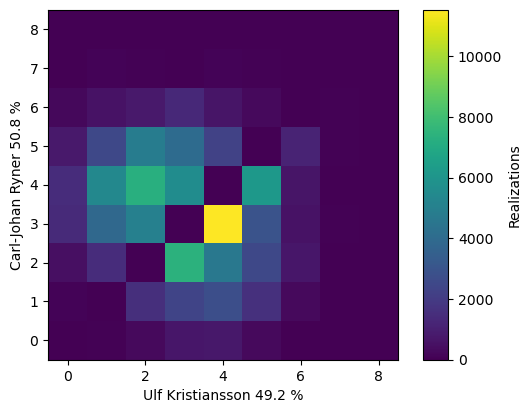

In [137]:
from utils import plotGame
plotGame('Carl-Johan Ryner','Ulf Kristiansson',LANES_B[0],data,LANES_A+LANES_B,100000)

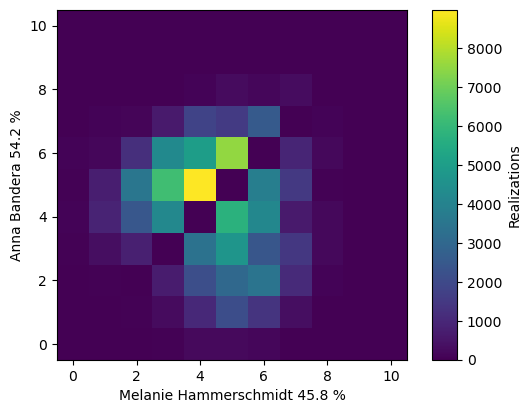

In [23]:
from utils import plotGame
plotGame('Anna Bandera','Melanie Hammerschmidt',LANES_B[0],data,LANES_A+LANES_B,100000)

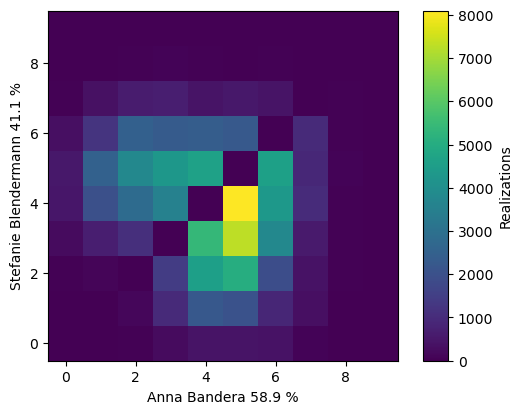

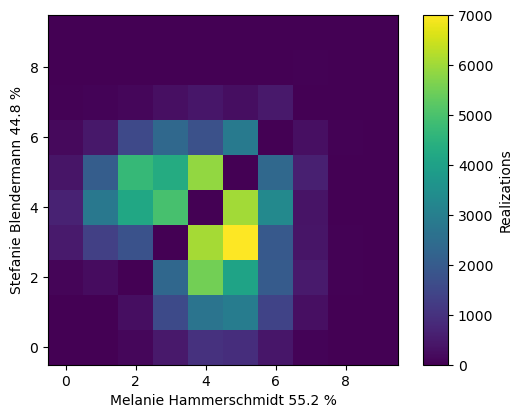

In [27]:
from utils import plotGame
plotGame('Stefanie Blendermann','Anna Bandera',LANES_B[0],data,LANES_A+LANES_B,100000)
plotGame('Stefanie Blendermann','Melanie Hammerschmidt',LANES_B[0],data,LANES_A+LANES_B,100000)